In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Do the following in the iris dataset

1. Read the dataset to python environment

In [2]:
df=pd.read_excel('iris_n.xls')
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# 2. Do the necessary pre-processing steps

In [3]:
df.shape

(150, 5)

In [4]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [5]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [8]:
#Need to fill those missing values in SL,SW and PL

<AxesSubplot:xlabel='SL', ylabel='Density'>

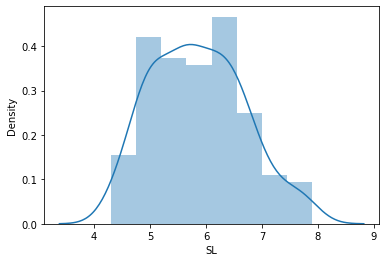

In [9]:
#For Sl
sns.distplot(df['SL'])

In [10]:
#Filling missing values in SL
df['SL']=df['SL'].fillna(df['SL'].median())

<AxesSubplot:xlabel='SW', ylabel='Density'>

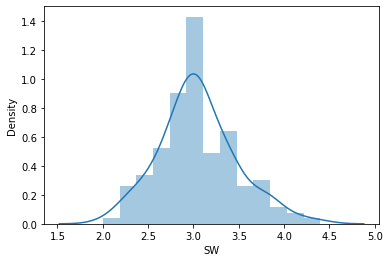

In [11]:
#For SW
sns.distplot(df['SW'])

In [12]:
#Filling missing values for SW
df['SW']=df['SW'].fillna(df['SW'].mean())

<AxesSubplot:xlabel='PL', ylabel='Density'>

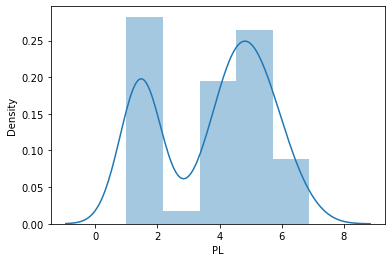

In [13]:
#For PL
sns.distplot(df['PL'])

In [14]:
#Filling missing values for PL
df['PL']=df['PL'].fillna(df['PL'].median())

In [15]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

All missing values are now filled

In [16]:
cor=df.corr()
cor

,SL,SW,PL,PW
SL,1.000000,-0.100511,0.830554,0.800939
SW,-0.100511,1.000000,-0.407669,-0.340278
PL,0.830554,-0.407669,1.000000,0.936089
PW,0.800939,-0.340278,0.936089,1.000000


<AxesSubplot:>

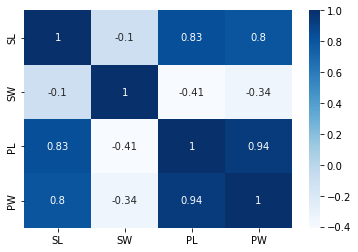

In [17]:
sns.heatmap(cor,annot=True,cmap='Blues')

In [18]:
#Unique values in target
df['Classification'].nunique()

3

In [19]:
df['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [20]:
#encoding 
from sklearn.preprocessing import LabelEncoder

In [21]:
le=LabelEncoder()
df['Classification']=le.fit_transform(df['Classification'])

In [22]:
df['Classification'].value_counts()

0    50
1    50
2    50
Name: Classification, dtype: int64

# 3. Find out which classification model gives the best result (also do random forest algorithm)

In [23]:
#Splitting dataset 
X=df.drop('Classification',axis=1)
y=df['Classification']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

# Model 1 Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr=LogisticRegression(max_iter=5000)
lr.fit(X_train,y_train)
ypred_lr=lr.predict(X_test)

In [28]:
accuracy_score(y_test,ypred_lr)

1.0

In [29]:
confusion_matrix(y_test,ypred_lr)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# Model 2 kNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
ypred_knn=knn.predict(X_test)

In [32]:
accuracy_score(y_test,ypred_knn)

1.0

In [33]:
confusion_matrix(y_test,ypred_knn)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# Model 3 Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier


dt=DecisionTreeClassifier()

dt.fit(X_train,y_train)
ypred_dt=dt.predict(X_test)

In [35]:
accuracy_score(y_test,ypred_dt)

1.0

In [36]:
confusion_matrix(y_test,ypred_dt)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# Method 4 Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(X_train,y_train)
ypred_rf=rf.predict(X_test)

In [38]:
accuracy_score(y_test,ypred_rf)

1.0

In [39]:
confusion_matrix(y_test,ypred_rf)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# Method 5 Support Vector Classifier Model

SVC Model with Kernal as Linear

In [40]:
from sklearn.svm import SVC

In [41]:
svm1=SVC(kernel='linear')
svm1=svm1.fit(X_train,y_train)
ypred_svm1=svm1.predict(X_test)

In [42]:
confusion_matrix(y_test,ypred_svm1)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [43]:
accuracy_score(y_test,ypred_svm1)

1.0

SVC Model with Kernal as RBF(Radial Basis Function)

In [44]:
svm2=SVC(kernel='rbf')
svm2=svm2.fit(X_train,y_train)
ypred_svm2=svm2.predict(X_test)

In [45]:
confusion_matrix(y_test,ypred_svm2)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [46]:
accuracy_score(y_test,ypred_svm2)

1.0

All models are giving 100% accuracy so doing cross validation to check.

#### Cross validation

In [47]:

from sklearn.model_selection import cross_validate
cvs_lr=cross_validate(lr,X,y,cv=5)
cvs_lr['test_score'].mean()

0.9466666666666667

In [48]:
cvs_knn=cross_validate(knn,X,y,cv=5)
cvs_knn['test_score'].mean()

0.9666666666666668

In [49]:
cvs_dt=cross_validate(dt,X,y,cv=5)
cvs_dt['test_score'].mean()

0.9399999999999998

In [50]:
cvs_rf=cross_validate(rf,X,y,cv=5)
cvs_rf['test_score'].mean()

0.96

In [51]:
cvs_svm1=cross_validate(svm1,X,y,cv=5)
cvs_svm1['test_score'].mean()

0.9600000000000002

In [52]:
cvs_svm2=cross_validate(svm2,X,y,cv=5)
cvs_svm2['test_score'].mean()

0.9400000000000001

From cross validation kNN   model shows better score than other 4 so kNN is the best models for this dataset